# Evaluation of 10-Epoch Run With GaoTextCNN

## Full Wikimedia personal attacks dataset with full-length entries

* Full-length of all documents.
* Docs with > 5 workers stating document contains a personal attack.
* Embeddings generated from the documents.
* Dropout probability rate: 0.5
* Number of filters: 300
* Test set size: 0.1
* Activation function: relu
* Convolutional layers: 3, 4, 5

In [52]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [89]:
# Get the csv of the metrics.
data = pd.read_csv('wikimedia-attacks-dev-ML-Workhorse-24022019-5.csv', header='infer')
data.head(10)

,epoch,num_recs,skl_acc,skl_prec,skl_recall,skl_f1,skl_f1_micro_avg,skl_f1_macro_avg,skl_f1_weighted_avg,skl_log_loss,gao_train_acc,gao_50k_val_acc,gao_100k_val_acc,gao_val_acc
0,1,104256,0.914988,0.713585,0.512359,0.596458,0.91,0.77,0.91,2.936227,0.914988,0.930859,0.935952,0.937419
1,2,104256,0.933826,0.793399,0.622419,0.697585,0.93,0.83,0.93,2.285573,0.933826,0.937419,0.938196,0.938455
2,3,104256,0.938344,0.817546,0.640019,0.717971,0.94,0.84,0.94,2.129534,0.938344,0.938196,0.939059,0.939059
3,4,104256,0.940694,0.829424,0.650031,0.728851,0.94,0.85,0.94,2.048368,0.940694,0.938282,0.939577,0.938628
4,5,104256,0.941385,0.832155,0.653864,0.732314,0.94,0.85,0.94,2.024515,0.938369,0.938973,0.941385,0.938541
5,6,104256,0.941999,0.839395,0.651674,0.733718,0.94,0.85,0.94,2.003312,0.941999,0.937592,0.938541,0.938714
6,7,104256,0.942133,0.839895,0.652456,0.734405,0.94,0.85,0.94,1.998674,0.942133,0.937937,0.938800,0.938541
7,8,104256,0.943006,0.843336,0.657306,0.738790,0.94,0.85,0.94,1.968526,0.943006,0.938196,0.938973,0.938541
8,9,104256,0.943332,0.845875,0.657697,0.740011,0.94,0.85,0.94,1.957262,0.943332,0.938196,0.939318,0.938196
9,10,104256,0.942900,0.845244,0.654099,0.737487,0.94,0.85,0.94,1.972170,0.94.2900,0.937937,0.939145,0.938800


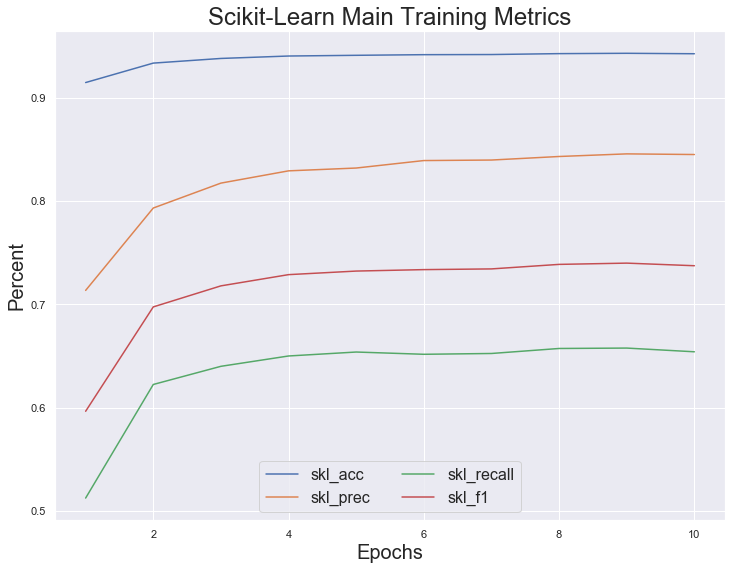

In [94]:
# The main four metrics in scikit-learn's metrics class.
plt.figure(figsize=(12,9))
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Percent', fontsize=20)
plt.title('Scikit-Learn Main Training Metrics', fontsize=24)
plt.plot(data['epoch'], data['skl_acc'], 
         data['epoch'], data['skl_prec'], 
         data['epoch'], data['skl_recall'], 
         data['epoch'], data['skl_f1'])
plt.legend(('skl_acc', 'skl_prec', 'skl_recall', 'skl_f1'), loc='lower center', ncol=2, fontsize=16);

<Figure size 432x288 with 0 Axes>

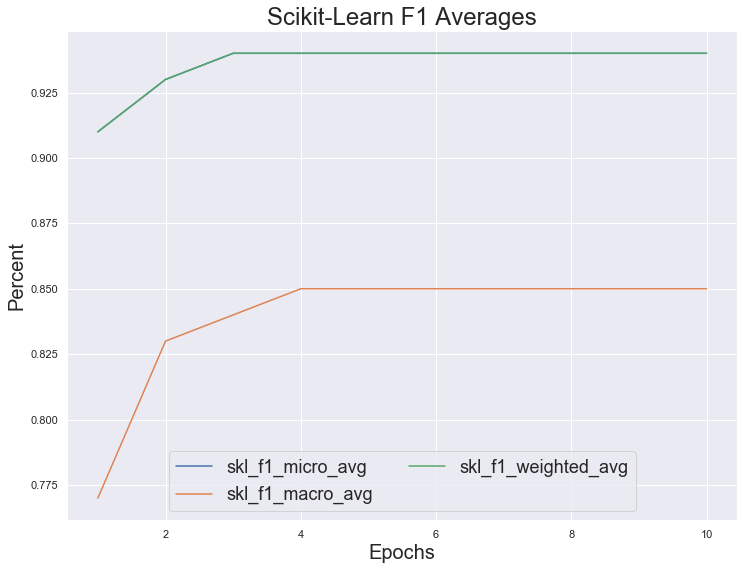

In [96]:
# Scikit-Learn F1 Averages
# NOTE: micro and weighted are identical, so the lines overlap.
plt.clf()
plt.figure(figsize=(12,9))
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Percent', fontsize=20)
plt.title('Scikit-Learn F1 Averages', fontsize=24)
plt.plot(data['epoch'], data['skl_f1_micro_avg'], 
         data['epoch'], data['skl_f1_macro_avg'], 
         data['epoch'], data['skl_f1_weighted_avg'])
plt.legend(('skl_f1_micro_avg', 'skl_f1_macro_avg', 'skl_f1_weighted_avg'), loc='lower center', ncol=2, fontsize=18);

<Figure size 432x288 with 0 Axes>

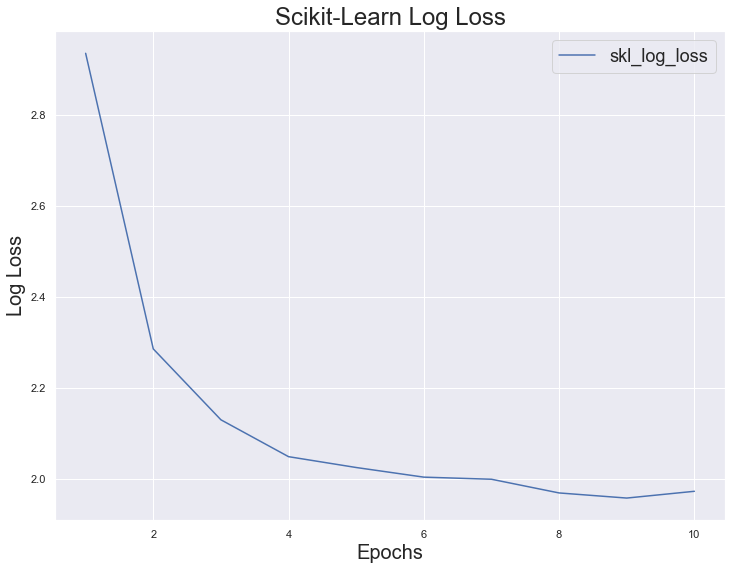

In [98]:
# Scikit-Learn Log Loss
plt.clf()
plt.figure(figsize=(12,9))
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Log Loss', fontsize=20)
plt.title('Scikit-Learn Log Loss', fontsize=24)
plt.plot(data['epoch'], data['skl_log_loss'])
plt.legend(('skl_log_loss',), loc='upper right', ncol=1, fontsize=18);

<Figure size 432x288 with 0 Axes>

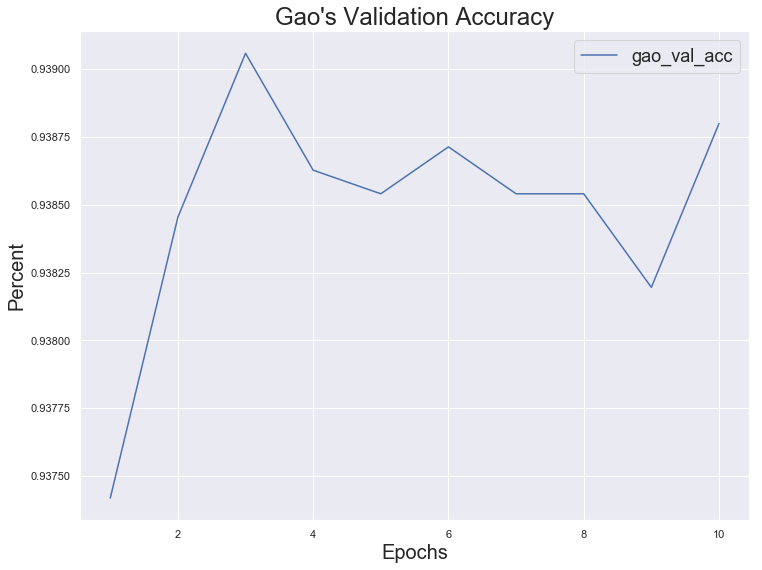

In [101]:
# Scikit-Learn Log Loss
plt.clf()
plt.figure(figsize=(12,9))
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Percent', fontsize=20)
plt.title('Gao\'s Validation Accuracy', fontsize=24)
plt.plot(data['epoch'], data['gao_val_acc'])
plt.legend(('gao_val_acc',), loc='upper right', ncol=1, fontsize=18);